<a href="https://colab.research.google.com/github/kwnstantinosRoumeliwtis/ML_course/blob/main/ML_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
print("Path to dataset files:", path)

100%|██████████| 8.17M/8.17M [00:01<00:00, 7.64MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1


In [2]:
df = pd.read_csv(os.path.join(path, "dataset.csv"))
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


1)

a)

In [3]:
out = df[["Unnamed: 0", "track_id", "artists", "album_name", "track_name"]]
df = df.drop(columns=["Unnamed: 0", "track_id", "artists", "album_name", "track_name"])
out.head()

,Unnamed: 0,track_id,artists,album_name,track_name
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On


In [4]:
df["track_genre"].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

b)

In [5]:
df_encoded = pd.get_dummies(df, columns=["track_genre"])


2)

In [6]:
num_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [7]:
bool_cols = df_encoded.select_dtypes(include="bool").columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

3)

In [8]:
X = df_encoded.values
k_values = [2, 3, 5, 7, 10, 15, 20]
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,random_state=42)
    kmeans.fit(X)
    print(k)
    sse.append(kmeans.inertia_)


2
3
5
7
10
15
20


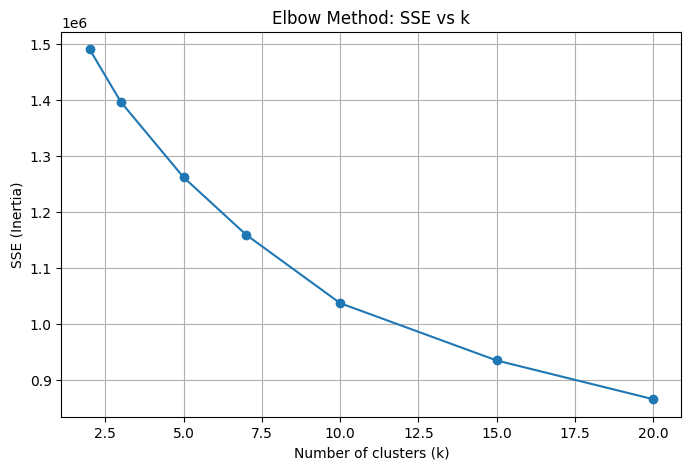

In [9]:
plt.figure(figsize=(8,5))
plt.plot(k_values, sse, marker='o')
plt.title("Elbow Method: SSE vs k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.grid(True)
plt.show()


4)

In [10]:
best_k = 10
kmeans = KMeans(n_clusters=best_k,init='k-means++',n_init=50,max_iter =500,random_state=42)
kmeans.fit(X)
df_encoded['cluster'] = kmeans.labels_

/tmp/ipython-input-693434675.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded['cluster'] = kmeans.labels_


5)

In [11]:
cluster_genre_percent = {}
genre_cols = [c for c in df_encoded.columns if c.startswith("track_genre_")]
for cluster in sorted(df_encoded['cluster'].unique()):
    cluster_df = df_encoded[df_encoded['cluster']== cluster]
    genre_counts = cluster_df[genre_cols].sum()
    genre_percent = genre_counts / len(cluster_df) *100
    dominant_genre = genre_percent.idxmax()
    dominant_percent = genre_percent.max()
    cluster_genre_percent[cluster] = (dominant_genre, dominant_percent)


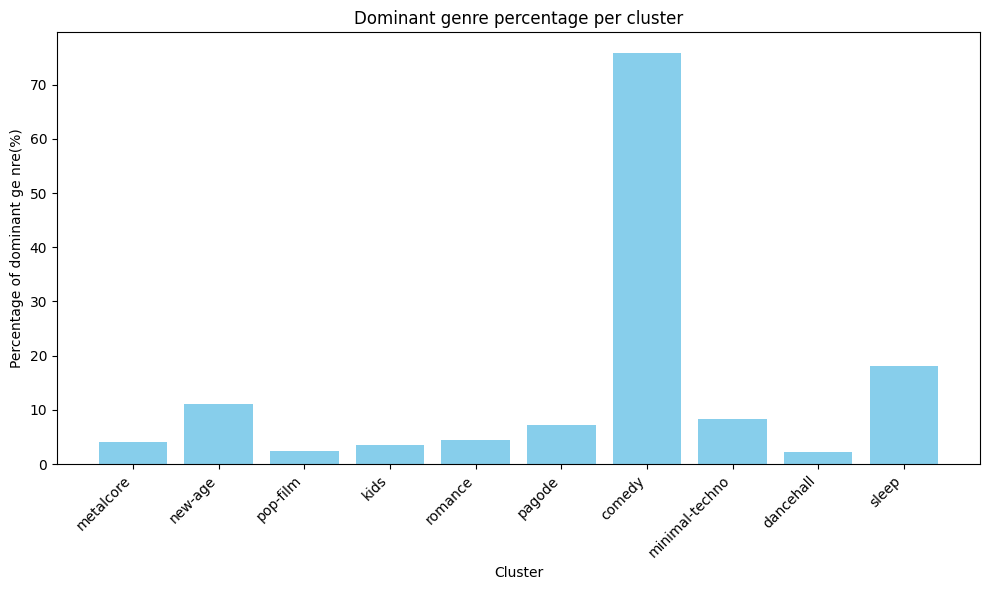

In [12]:
clusters = list(cluster_genre_percent.keys())
dominant_genres = [cluster_genre_percent[c][0].replace("track_genre_", "") for c in clusters]
percentages = [cluster_genre_percent[c][1] for c in clusters]
plt.figure(figsize=(10,6))
plt.bar(clusters, percentages, color='skyblue')
plt.xticks(clusters, dominant_genres, rotation=45, ha='right')
plt.ylabel("Percentage of dominant ge nre(%)")
plt.xlabel("Cluster")
plt.title("Dominant genre percentage per cluster")
plt.tight_layout()
plt.show()


6) Με βάση τον ήχο και τη μουσική υπόκρουση τα κομμάτια που αναφέρονται ταιριάζουν αρκετά αλλά δεν είναι και όλα στην ίδια κατηγορία.

In [13]:
full_df = df_encoded.copy()
full_df[['track_name', 'artists', 'album_name']] = out[['track_name', 'artists', 'album_name']]
full_df['cluster'] = df_encoded['cluster']
selected_track = "Blinding Lights"
selected_artist = "The Weeknd"
track_idx = full_df[(full_df['track_name'] == selected_track ) & (full_df['artists'] == selected_artist)].index[0]
track_cluster = full_df.loc[track_idx, 'cluster']
print(f"The song '{selected_track}' by {selected_artist} is in cluster {track_cluster}")

cluster_df = full_df[full_df['cluster'] == track_cluster].copy()
cluster_df = cluster_df[~((cluster_df['track_name']== selected_track) &(cluster_df['artists'] == selected_artist))]
cluster_df = cluster_df.drop_duplicates(subset=['track_name', 'artists'])

feature_cols = df_encoded.columns.drop('cluster')
X_cluster = cluster_df[feature_cols].values
X_track = full_df.loc[[track_idx], feature_cols].values
distances = cdist(X_track, X_cluster, metric='euclidean')[0]
cluster_df['distance_to_selected']= distances
top3 = cluster_df.nsmallest(3, 'distance_to_selected')
print("\nTop 3 proposals:")

for i, row in top3.iterrows():
    print(f"{row['track_name']} - {row['artists']} (Cluster {row['cluster']})")


The song 'Blinding Lights' by The Weeknd is in cluster 2

Top 3 proposals:
Thunder - Imagine Dragons (Cluster 2)
Orasaadha - Madras Gig - Vivek - Mervin (Cluster 2)
Fireflies - Owl City (Cluster 2)


7) Οι συστάσεις είναι ίδιες εκτός από 1, νομίζω ταιριάζει καλύτερα .

In [14]:
cos_sim = cosine_similarity(X_track, X_cluster)[0]
cos_dist = 1- cos_sim
cluster_df['cosine_distance'] = cos_dist
top3_cosine = cluster_df.nsmallest(3, 'cosine_distance')
print("\nTop 3 proposals (Cosine Distance):")

for i, row in top3_cosine.iterrows():
    print(f"{row['track_name']} - {row['artists']} (Cluster {row['cluster']})")


Top 3 proposals (Cosine Distance):
Thunder - Imagine Dragons (Cluster 2)
Orasaadha - Madras Gig - Vivek - Mervin (Cluster 2)
Secrets - OneRepublic (Cluster 2)


9)

In [15]:
dbscan = DBSCAN(eps=3, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
print("Number of the  clusters (DBSCAN):", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))


Number of the  clusters (DBSCAN): 10
